In [1]:
import pandas as pd
from prophet import Prophet


df = pd.read_csv('./models/data1.csv')
df.head()

Importing plotly failed. Interactive plots will not work.


,Time,"{endpoint=""web"", handler=""/searches/"", instance=""10.1.3.78:8500"", job=""bet-data-service"", method=""GET"", namespace=""dsbd"", pod=""bet-data-service-db857d4db-v8lnw"", service=""bet-data-service"", status=""2xx""}"
0,2022-01-30 08:29:30,0.191
1,2022-01-30 08:30:00,0.190
2,2022-01-30 08:30:30,0.187
3,2022-01-30 08:31:00,0.189
4,2022-01-30 08:31:30,0.193


In [7]:
m = Prophet()
df = df.rename(columns={df.columns[0]: 'ds', df.columns[1]: 'y'})
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


In [10]:
future = m.make_future_dataframe(periods=5)
future.tail()

,ds
31,2022-01-31 08:44:30
32,2022-02-01 08:44:30
33,2022-02-02 08:44:30
34,2022-02-03 08:44:30
35,2022-02-04 08:44:30


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2022-01-31 08:44:30,-1.080637,-8.878115,6.673257
32,2022-02-01 08:44:30,-2.358542,-23.903588,18.285359
33,2022-02-02 08:44:30,-3.636447,-42.993542,33.842384
34,2022-02-03 08:44:30,-4.914352,-65.991687,53.041852
35,2022-02-04 08:44:30,-6.192257,-89.608751,76.694509


In [12]:
df

,ds,y
0,2022-01-30 08:29:30,0.191
1,2022-01-30 08:30:00,0.190
2,2022-01-30 08:30:30,0.187
3,2022-01-30 08:31:00,0.189
4,2022-01-30 08:31:30,0.193
5,2022-01-30 08:32:00,0.191
6,2022-01-30 08:32:30,0.192
7,2022-01-30 08:33:00,0.194
8,2022-01-30 08:33:30,0.199
9,2022-01-30 08:34:00,0.201


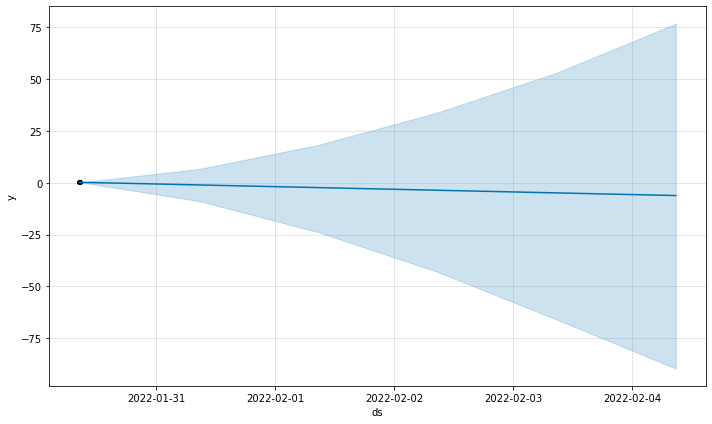

In [13]:
fig1 = m.plot(forecast)

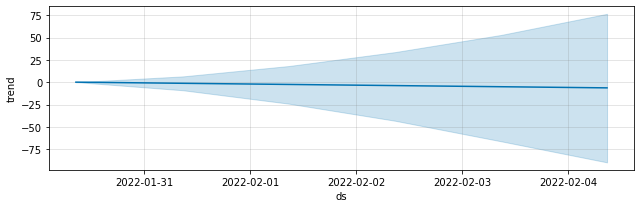

In [14]:
fig2 = m.plot_components(forecast)

<AxesSubplot:>

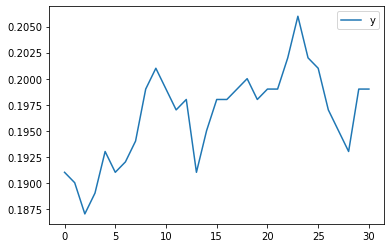

In [15]:
df.plot()

In [20]:
df

,ds,y
0,2022-01-30 08:29:30,0.191
1,2022-01-30 08:30:00,0.190
2,2022-01-30 08:30:30,0.187
3,2022-01-30 08:31:00,0.189
4,2022-01-30 08:31:30,0.193
5,2022-01-30 08:32:00,0.191
6,2022-01-30 08:32:30,0.192
7,2022-01-30 08:33:00,0.194
8,2022-01-30 08:33:30,0.199
9,2022-01-30 08:34:00,0.201
